In [1]:
%matplotlib inline
import networkx as nx

## 露天掘り問題

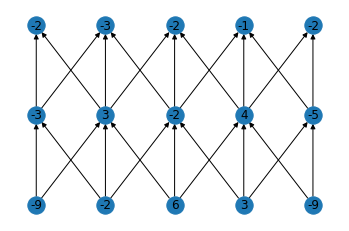

In [2]:
# 露天掘り問題の入力
G2 = nx.DiGraph()
G2.add_nodes_from(list(range(15)))
G2.add_edges_from([(0, 5), (0, 6), (1, 5), (1, 6), (1, 7), (2, 6), (2, 7), (2, 8), (3, 7), (3, 8), (3, 9), (4, 8), (4, 9),
              (5, 10), (5, 11), (6, 10), (6, 11), (6, 12), (7, 11), (7, 12), (7, 13), (8, 12), (8, 13), (8, 14), (9, 13), (9, 14)])
mypos2 = {0: (0, 0), 1: (10, 0), 2: (20, 0), 3: (30, 0), 4: (40, 0),
          5: (0, 10), 6: (10, 10), 7: (20, 10), 8: (30, 10), 9: (40, 10),
          10: (0, 20), 11: (10, 20), 12: (20, 20), 13: (30, 20), 14: (40, 20)}
profit = {0: -9, 1: -2, 2: 6, 3: 3, 4: -9,
          5: -3, 6: 3, 7: -2, 8: 4, 9: -5,
          10: -2, 11: -3, 12: -2, 13: -1, 14: -2}
nx.draw_networkx_labels(G2, pos = mypos2, labels = profit)
nx.draw(G2, pos = mypos2)

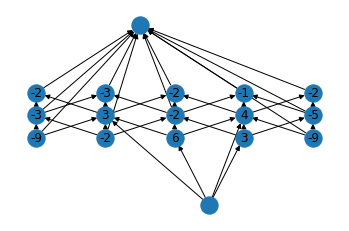

In [3]:
# 最小s,tカット問題へ変換
G2c = nx.DiGraph()
G2c.add_nodes_from(G2.nodes())
G2c.add_edges_from(G2.edges())
for e in G2c.edges():
    nx.set_edge_attributes(G2c, 'capacity', (max(profit)-min(profit))*G2.number_of_nodes())
G2c.add_nodes_from(['s', 't'])
for u in G2.nodes():
    if profit[u] > 0:
        G2c.add_edge('s', u, capacity = profit[u])
    if profit[u] < 0:
        G2c.add_edge(u, 't', capacity = -profit[u])
mypos2['s'] = (25, -30)
mypos2['t'] = (15, 50)
node_labels = nx.draw_networkx_labels(G2c, pos = mypos2, labels = profit)
nx.draw(G2c, pos = mypos2)

In [4]:
# 最小s,tカットの計算
c2 = nx.minimum_cut(G2c, 's', 't')
print(c2)

(15, ({2, 's', 6, 7, 8, 10, 11, 12, 13, 14}, {0, 1, 3, 4, 5, 't', 9}))


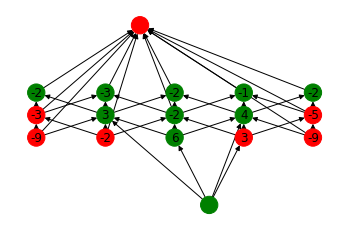

In [5]:
# 最小s,tカットの描画
nodecolor_c = list(map(lambda v: 'g' if v in c2[1][0] else 'r', G2c.nodes()))
node_labels = nx.draw_networkx_labels(G2c, pos = mypos2, labels = profit)
nx.draw(G2c, pos = mypos2, node_color = nodecolor_c)

## 最密部分グラフ問題

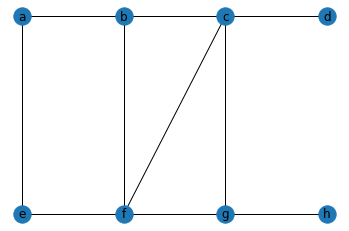

In [6]:
# 最密部分グラフ問題の入力
G1 = nx.Graph()
G1.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
G1.add_edges_from([('a', 'b'), ('a', 'e'), ('b', 'c'), ('b', 'f'), ('c', 'd'), ('c', 'f'), ('c', 'g'), ('e', 'f'), ('f', 'g'), ('g', 'h')])
mypos1 = {'a': (0, 10), 'b': (10, 10), 'c': (20, 10), 'd': (30, 10), 'e': (0, 0), 'f': (10, 0), 'g': (20, 0), 'h': (30, 0)}
nx.draw_networkx_labels(G1, pos = mypos1)
nx.draw(G1, pos = mypos1)

In [7]:
# 最密部分グラフ問題の密度保証
g = 1.2

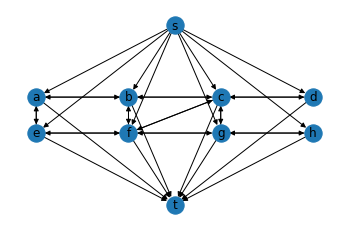

In [8]:
# 最小s,tカット問題へ変換
G1c = nx.DiGraph()
G1c.add_nodes_from(G1.nodes())
for [u, v] in G1.edges():
    G1c.add_edge(u, v, capacity = 1)
    G1c.add_edge(v, u, capacity = 1)
for e in G1c.edges():
    nx.set_edge_attributes(G1c, 'capacity', 1)
G1c.add_nodes_from(['s', 't'])
for u in G1.nodes():
    G1c.add_edge('s', u, capacity = G1.number_of_edges())
    G1c.add_edge(u, 't', capacity = G1.number_of_edges() + 2*g - G1.degree[u])
mypos1['s'] = (15, 30)
mypos1['t'] = (15, -20)
nx.draw_networkx_labels(G1c, pos = mypos1)
nx.draw(G1c, pos = mypos1)

In [9]:
# 最小s,tカットの計算
c1 = nx.minimum_cut(G1c, 's', 't')
print(c1)

(78.4, ({'e', 's', 'b', 'g', 'f', 'c', 'a'}, {'t', 'd', 'h'}))


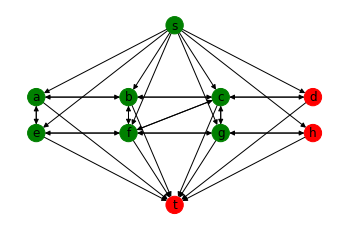

In [10]:
# 最小s,tカットの描画
nodecolor_c = list(map(lambda v: 'g' if v in c1[1][0] else 'r', G1c.nodes()))
nx.draw_networkx_labels(G1c, pos = mypos1)
nx.draw(G1c, pos = mypos1, node_color = nodecolor_c)

## 画像の領域分割

In [11]:
import math
import itertools
import io
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 画像の読み込み
f = io.BytesIO(urllib.request.urlopen("https://www.uec.ac.jp/research/information/opal-ring/images/6184-0.jpg").read())
img = Image.open(f)
imgarray = np.array(img)

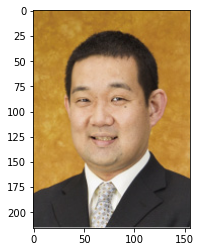

In [13]:
plt.imshow(imgarray) # 画像の表示
width, height = img.size # 画像の大きさ
img_pixels = np.array([[img.getpixel((i,j)) for j in range(height)] for i in range(width)])

In [14]:
# RGB値から強度を計算する
def intensity(r, g, b):
    return 0.2126*r + 0.7152*g + 0.0722*b
# 弧の容量 (sigma はカメラノイズと呼ばれるパラメータ)
def arc_weight(u, v, sigma):
    return math.exp((-(intensity(u[0], u[1], u[2])-intensity(v[0], v[1], v[2]))**2)/(2*(sigma**2)))

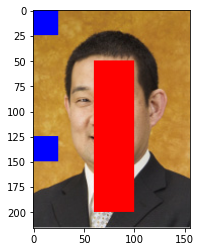

In [15]:
# 物体の一部分を指定
obj_pixels = list(itertools.product(range(60,100), range(50,200)))
#obj_pixels = list(itertools.product(range(150), range(200, 230))) + list(itertools.product(range(60,100), range(50,200)))
# 背景の一部分を指定
bkg_pixels = list(itertools.product(range(25), range(25))) + list(itertools.product(range(25), range(125,150)))

# 指定部分の表示：赤が物体，青が背景
inputimg = Image.new('RGB', (width, height))
for i in range(width):
    for j in range(height):
        if (i,j) in obj_pixels:
            inputimg.putpixel((i,j), (255,0,0))
        elif (i,j) in bkg_pixels:
            inputimg.putpixel((i,j), (0,0,255))
        else:
            inputimg.putpixel((i,j), img.getpixel((i,j)))
inputimgarray = np.array(inputimg)
plt.imshow(inputimgarray)

In [16]:
# ネットワークの作成
G1 = nx.DiGraph()
for i in range(width):
    G1.add_nodes_from([(i,j) for j in range(height)])
G1.add_nodes_from(['source', 'target'])
for i in range(width):
    for j in range(height):
        if i < width-1:
            G1.add_edge((i,j), (i+1,j), capacity = arc_weight(img_pixels[i,j], img_pixels[i+1,j], 1))
            G1.add_edge((i+1,j), (i,j), capacity = arc_weight(img_pixels[i+1,j], img_pixels[i,j], 1))
        if j < height-1:
            G1.add_edge((i,j), (i,j+1), capacity = arc_weight(img_pixels[i,j], img_pixels[i,j+1], 1))
            G1.add_edge((i,j+1), (i,j), capacity = arc_weight(img_pixels[i,j+1], img_pixels[i,j], 1))
        #G1.add_edge('source', (i,j), capacity = 2.3)
        #G1.add_edge((i,j), 'target', capacity = 0)
for p in obj_pixels:
    G1.add_edge('source', p, capacity = width*height)
    G1.add_edge(p, 'source', capacity = 0)
for p in bkg_pixels:
    G1.add_edge('source', p, capacity = 0)
    G1.add_edge(p, 'target', capacity = width*height)

In [17]:
# 最小s,tカットの計算
cut = nx.minimum_cut(G1, 'source', 'target')

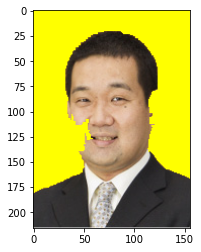

In [18]:
# 計算結果 (出力画像) の表示
outputimg = Image.new('RGB', (width, height))
for i in range(width):
    for j in range(height):
        if (i,j) in cut[1][0]:
            outputimg.putpixel((i,j), img.getpixel((i,j)))
        else:
            outputimg.putpixel((i,j), (255,255,0))
outputimgarray = np.array(outputimg)
plt.imshow(outputimgarray)